In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("Train.csv")

In [55]:
df.shape

(8523, 12)

# Data Cleaning and Handling Missing Value

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [57]:
for col in df.columns[df.dtypes == 'object'].tolist():
    print(col)
    print()
    print(df[col].unique())
    print('-' * 20)

Item_Identifier

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
--------------------
Item_Fat_Content

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
--------------------
Item_Type

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
--------------------
Outlet_Identifier

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
--------------------
Outlet_Size

['Medium' nan 'High' 'Small']
--------------------
Outlet_Location_Type

['Tier 1' 'Tier 3' 'Tier 2']
--------------------
Outlet_Type

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
--------------------


In [58]:
df.loc[df['Item_Fat_Content'] == 'LF','Item_Fat_Content'] = 'low fat'
df.loc[df['Item_Fat_Content'] == 'reg','Item_Fat_Content'] = 'regular'
df.loc[df['Item_Fat_Content'] == 'Low Fat','Item_Fat_Content'] = 'low fat'
df.loc[df['Item_Fat_Content'] == 'Regular','Item_Fat_Content'] = 'regular'


In [59]:
df['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [71]:
for col in df.columns[df.dtypes == 'object'].tolist()[1:]:
    df[col] = df[col].astype("category")

In [60]:
df.isna().sum() / len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

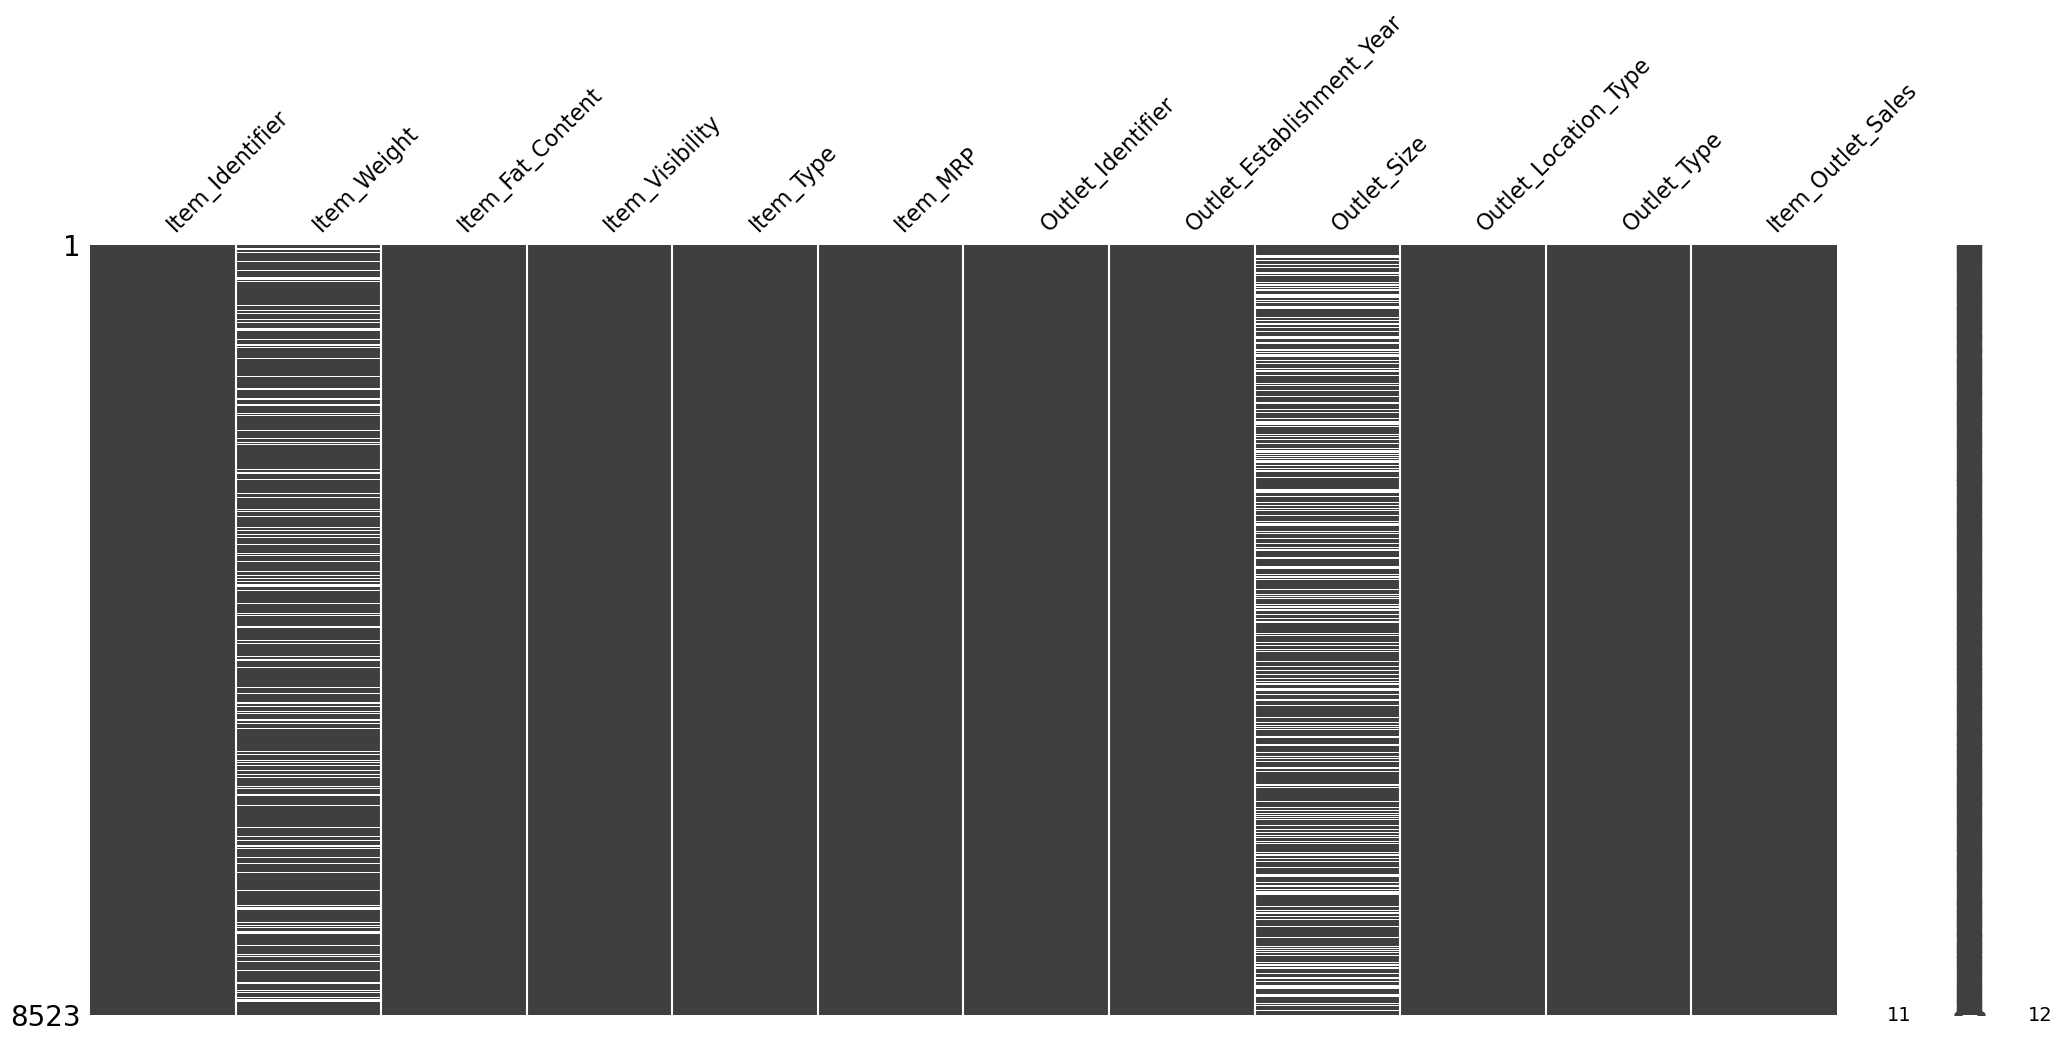

<Figure size 100x200 with 0 Axes>

In [67]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize=(1, 2)) 
plt.show()

In [86]:
for col in df.columns[df.dtypes == 'category'].tolist():
    print(col)
    print()
    print(df[col].unique())
    print('-' * 20)

Item_Fat_Content

['low fat', 'regular']
Categories (2, object): ['low fat', 'regular']
--------------------
Item_Type

['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']
--------------------
Outlet_Identifier

['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
Categories (10, object): ['OUT010', 'OUT013', 'OUT017', 'OUT018', ..., 'OUT035', 'OUT045', 'OUT046', 'OUT049']
--------------------
Outlet_Size

['Medium', NaN, 'High', 'Small']
Categories (3, object): ['High', 'Medium', 'Small']
--------------------
Outlet_Location_Type

['Tier 1', 'Tier 3', 'Tier 2']
Categories (3, object): ['Tier 1', 'Tier 2', 'Tier 3']
--------------------
Outlet_Type

['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Su

In [105]:
mean_values = df.groupby(['Item_Type','Item_Fat_Content']).mean()['Item_Weight']
mean_values

Item_Type              Item_Fat_Content
Baking Goods           low fat             12.552996
                       regular             12.013303
Breads                 low fat             12.429912
                       regular             10.002143
Breakfast              low fat             11.849412
                       regular             13.336182
Canned                 low fat             11.864650
                       regular             12.804289
Dairy                  low fat             13.391497
                       regular             13.483797
Frozen Foods           low fat             12.580333
                       regular             13.180539
Fruits and Vegetables  low fat             12.757046
                       regular             13.708363
Hard Drinks            low fat             11.400328
                       regular                   NaN
Health and Hygiene     low fat             13.142314
                       regular                   NaN
Househ

In [106]:
for index, row in df.iterrows():
    if pd.isna(row['Item_Weight']):
        item_type = row['Item_Type']
        fat_content = row['Item_Fat_Content']
        mean_value = mean_values[item_type, fat_content]
        df.at[index, 'Item_Weight'] = mean_value

In [109]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [120]:
count_values = df.groupby('Outlet_Type')['Outlet_Size'].value_counts()
count_values

Outlet_Type              
Grocery Store      Small      528
                   High         0
                   Medium       0
Supermarket Type1  Small     1860
                   High       932
                   Medium     930
Supermarket Type2  Medium     928
                   High         0
                   Small        0
Supermarket Type3  Medium     935
                   High         0
                   Small        0
Name: Outlet_Size, dtype: int64

In [124]:
for index, row in df.iterrows():
    if pd.isna(row['Outlet_Size']):
        outlet_type = row['Outlet_Type']
        if outlet_type in ['Grocery Store', 'Supermarket Type1']:
            df.at[index, 'Outlet_Size'] = 'Small'
        else:
            df.at[index, 'Outlet_Size'] = 'Medium'

In [129]:
df['Outlet_Size'].unique()

['Medium', 'Small', 'High']
Categories (3, object): ['High', 'Medium', 'Small']

In [125]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Questions with their corresponding answers

### Q1 : what is the most outlet made money?

In [138]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


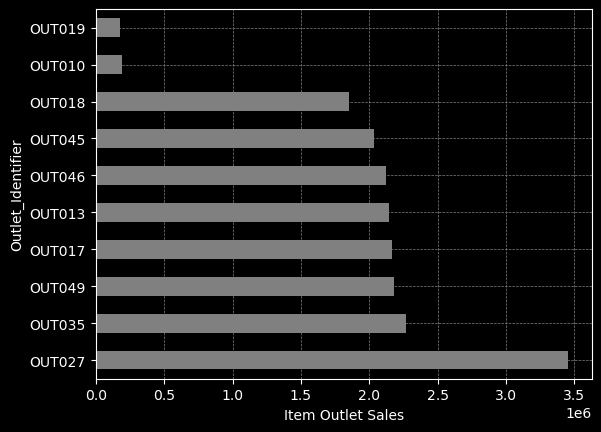

In [155]:
ax = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind = 'barh', color='gray')
ax.set_xlabel('Item Outlet Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q2 : is Outlet Type affect on sales ?

In [153]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


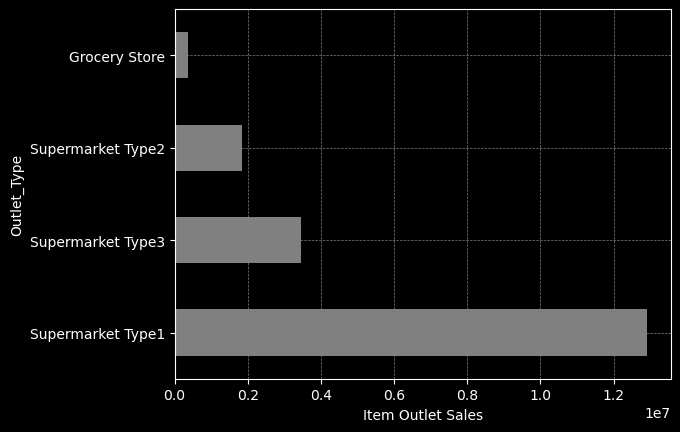

In [159]:
ax = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind = 'barh', color='gray')
ax.set_xlabel('Item Outlet Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q3 : is Outlet Location Type affect on salaes ?

In [160]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


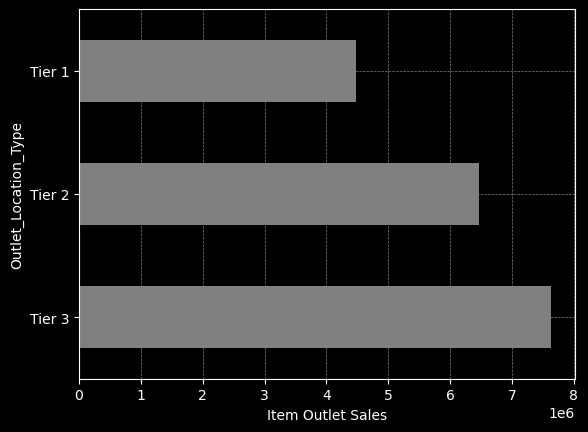

In [161]:
ax = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind = 'barh', color='gray')
ax.set_xlabel('Item Outlet Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q4 : what is the most item type get sold ?

In [162]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [196]:
data = df.groupby(['Outlet_Identifier'])['Item_Type'].value_counts().unstack()
data

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Identifier,,,,,,,,,,,,,,,,
OUT010,42,17,9,35,43,54,79,16,37,67,34,10,4,71,28,9
OUT013,73,25,13,65,80,92,142,23,61,103,41,16,5,125,49,19
OUT017,73,22,12,69,74,106,127,22,61,95,44,16,5,128,54,18
OUT018,68,27,12,78,73,92,135,22,58,95,46,20,7,132,46,17
OUT019,43,16,10,38,49,49,73,8,30,52,32,17,6,75,26,4
OUT027,69,31,11,72,67,89,140,23,60,99,56,15,7,137,45,14
OUT035,68,29,10,79,71,92,129,22,50,102,43,16,8,140,52,19
OUT045,70,33,10,74,69,81,143,28,55,99,38,20,9,133,51,16
OUT046,76,26,10,72,78,108,126,20,56,103,44,22,6,120,48,15


In [233]:
best_sales = {}
for index in data.index.tolist():
    sales = dict(data.loc[index][data.loc[index] == data.loc[index].max()])
    best_sales[index] = sales
best_sales

{'OUT010': {'Fruits and Vegetables': 79},
 'OUT013': {'Fruits and Vegetables': 142},
 'OUT017': {'Snack Foods': 128},
 'OUT018': {'Fruits and Vegetables': 135},
 'OUT019': {'Snack Foods': 75},
 'OUT027': {'Fruits and Vegetables': 140},
 'OUT035': {'Snack Foods': 140},
 'OUT045': {'Fruits and Vegetables': 143},
 'OUT046': {'Fruits and Vegetables': 126},
 'OUT049': {'Snack Foods': 139}}

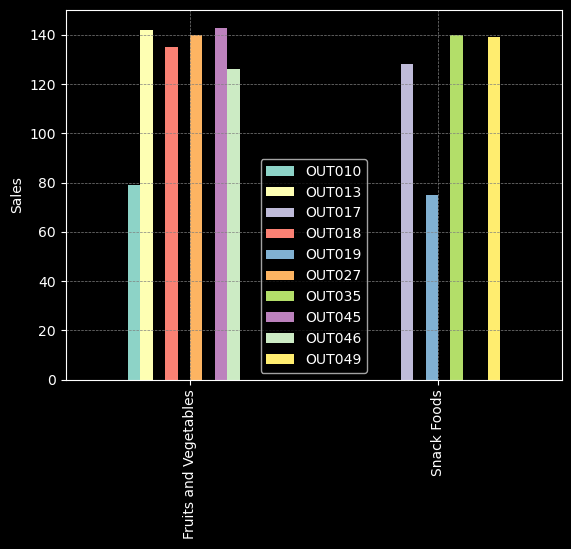

In [256]:
data = pd.DataFrame(best_sales)
ax = data.plot.bar()
ax.set_ylabel('Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q5 : in any year we established more supermarkets?

In [257]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


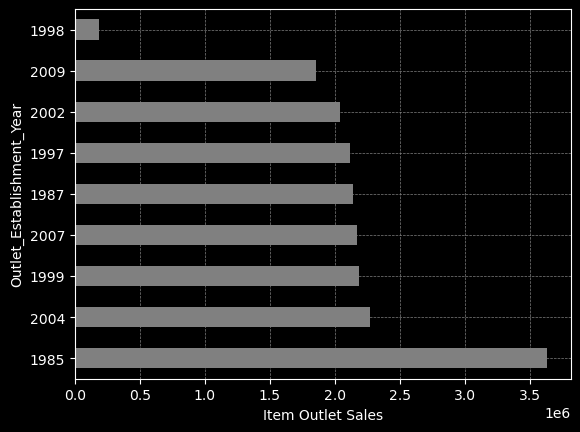

In [264]:
ax = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind = 'barh', color='gray')
ax.set_xlabel('Item Outlet Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q6 : What is the most product sold?

In [259]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


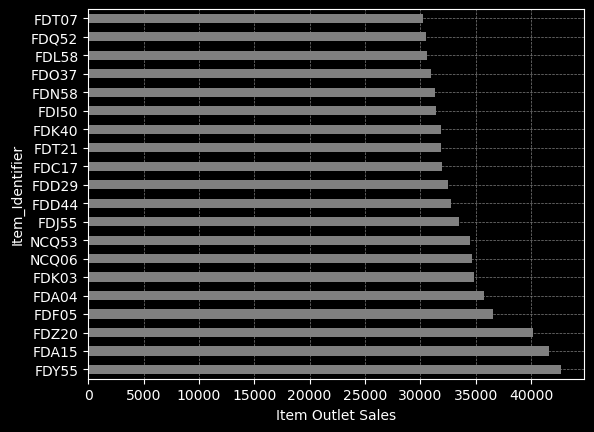

In [265]:
ax = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:20].plot(kind = 'barh', color='gray')
ax.set_xlabel('Item Outlet Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

# Data Preprocessing

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [267]:
hold = df
df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [288]:
X = df.drop('Item_Outlet_Sales' ,axis = 1)
y = df['Item_Outlet_Sales']
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=33)

#  Build Machine Learning Model 

In [294]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [295]:
models = {
                'Linear Regression': LinearRegression(),
                'Ridge Regression': Ridge(),
                'Lasso Regression': Lasso(),
                'ElasticNet Regression': ElasticNet(),
                'SVR': SVR(),
                'Decision Tree Regression': DecisionTreeRegressor(),
                'Random Forest Regression': RandomForestRegressor(),
                'KNN Regression': KNeighborsRegressor()
            }

In [296]:
for model_name, model in models.items():
    model.fit(x_train ,y_train)
    print()
    train_score = r2_score(y_train , model.predict(x_train))
    test_score = r2_score(y_test , model.predict(x_test))
    print(f'Model Name is {model_name} ')
    print(f'Train accuracy = {train_score} ')
    print(f'Test accuracy = {test_score} ')
    print('-' * 20)



Model Name is Linear Regression 
Train accuracy = 0.6645790629473396 
Test accuracy = -8498055719147767.0 
--------------------

Model Name is Ridge Regression 
Train accuracy = 0.6599739224813812 
Test accuracy = 0.479555862186548 
--------------------

Model Name is Lasso Regression 
Train accuracy = 0.5674960592769178 
Test accuracy = 0.5570803373685578 
--------------------

Model Name is ElasticNet Regression 
Train accuracy = 0.4668248419000429 
Test accuracy = 0.4646566348375204 
--------------------

Model Name is SVR 
Train accuracy = -0.04838997167802672 
Test accuracy = -0.0313303361826589 
--------------------

Model Name is Decision Tree Regression 
Train accuracy = 1.0 
Test accuracy = 0.22724757605931523 
--------------------

Model Name is Random Forest Regression 
Train accuracy = 0.9384422501279001 
Test accuracy = 0.5533458914018583 
--------------------

Model Name is KNN Regression 
Train accuracy = 0.6483687795904184 
Test accuracy = 0.480651242573797 
----------

In [297]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alpha_values = [0.001, 0.01, 0.1, 1, 10]

param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')

grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso_best = Lasso(alpha=best_alpha)

lasso_best.fit(x_train, y_train)

y_pred = lasso_best.predict(x_test)

test_score = r2_score(y_test, y_pred)

print(f'Best Alpha: {best_alpha}')
print(f'Test R^2 Score: {test_score}')

d:\Anconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.509e+09, tolerance: 1.580e+06
  model = cd_fast.enet_coordinate_descent(
d:\Anconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+09, tolerance: 1.598e+06
  model = cd_fast.enet_coordinate_descent(
d:\Anconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.455e+09, tolerance: 1.596e+06
  model = cd_fast.enet_coordi

Best Alpha: 10
Test R^2 Score: 0.5595931490275325
